<a href="https://colab.research.google.com/github/jj2883/Applied_DL_COMS4995/blob/master/App_DL_HW2_Part1_P1_P2_jj2883.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import os

# The code in this notebook should work identically in TF v1 and v2
import tensorflow as tf
import zipfile

from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:

!wget https://storage.googleapis.com/applied-dl/mini_flowers.zip \
    -O /tmp/mini_flowers.zip

--2019-03-04 19:33:35--  https://storage.googleapis.com/applied-dl/mini_flowers.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 2404:6800:4008:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40110537 (38M) [application/zip]
Saving to: ‘/tmp/mini_flowers.zip’

/tmp/mini_flowers.z 100%[===================>]  38.25M  60.9MB/s    in 0.6s    

2019-03-04 19:33:41 (60.9 MB/s) - ‘/tmp/mini_flowers.zip’ saved [40110537/40110537]



In [0]:
local_zip = '/tmp/mini_flowers.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/mini_flowers')
zip_ref.close()

In [0]:
base_dir = '/tmp/mini_flowers'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

train_daisy_dir = os.path.join(train_dir, 'daisy')
train_dandelion_dir = os.path.join(train_dir, 'dandelion')
train_roses_dir = os.path.join(train_dir, 'roses')
train_sunflowers_dir = os.path.join(train_dir, 'sunflowers')
train_tulips_dir = os.path.join(train_dir, 'tulips')

validation_daisy_dir = os.path.join(validation_dir, 'daisy')
validation_dandelion_dir = os.path.join(validation_dir, 'dandelion')
validation_roses_dir = os.path.join(validation_dir, 'roses')
validation_sunflowers_dir = os.path.join(validation_dir, 'sunflowers')
validation_tulips_dir = os.path.join(validation_dir, 'tulips')

In [0]:
num_daisy_tr = len(os.listdir(train_daisy_dir))
num_dandelion_tr = len(os.listdir(train_dandelion_dir))
num_roses_tr = len(os.listdir(train_roses_dir))
num_sunflowers_tr = len(os.listdir(train_sunflowers_dir))
num_tulips_tr = len(os.listdir(train_tulips_dir))

num_daisy_val = len(os.listdir(validation_daisy_dir))
num_dandelion_val = len(os.listdir(validation_dandelion_dir))
num_roses_val = len(os.listdir(validation_roses_dir))
num_sunflowers_val = len(os.listdir(validation_sunflowers_dir))
num_tulips_val = len(os.listdir(validation_tulips_dir))

total_train = num_daisy_tr + num_dandelion_tr + num_roses_tr + num_sunflowers_tr+ num_tulips_tr
total_val = num_daisy_val + num_dandelion_val + num_roses_val + num_sunflowers_val + num_tulips_val

In [6]:
print('Training daisy images:', num_daisy_tr)
print('Training dandelion images:', num_dandelion_tr)
print('Training roses images:', num_roses_tr)
print('Training sunflowers images:', num_sunflowers_tr)
print('Training tulips images:', num_tulips_tr)

print('Validation daisy images:', num_daisy_val)
print('TValidation dandelion images:', num_dandelion_val)
print('Validation roses images:', num_roses_val)
print('Validation sunflowers images:', num_sunflowers_val)
print('Validation tulips images:', num_tulips_val)

print("--")

print("Total training images:", total_train)
print("Total validation images:", total_val)

Training daisy images: 200
Training dandelion images: 200
Training roses images: 200
Training sunflowers images: 200
Training tulips images: 200
Validation daisy images: 100
TValidation dandelion images: 100
Validation roses images: 100
Validation sunflowers images: 100
Validation tulips images: 100
--
Total training images: 1000
Total validation images: 500


# Part 1 P1 Transfer Learning on VGG16

In [7]:
conv_base = VGG16(weights='imagenet',include_top=False, input_shape=(150, 150, 3))


Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 5s 0us/step


In [8]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
TARGET_SHAPE = 150 
BATCH_SIZE = 32

In [0]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [11]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 2565      
Total params: 18,912,069
Trainable params: 18,912,069
Non-trainable params: 0
_________________________________________________________________


In [0]:
conv_base.trainable = False


In [13]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=train_dir, 
    shuffle=True, 
    target_size=(TARGET_SHAPE,TARGET_SHAPE),
    class_mode='categorical')

# Validation data should not be augmented!
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=validation_dir, 
    target_size=(TARGET_SHAPE, TARGET_SHAPE),
    class_mode='categorical')

Found 1000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [0]:
EPOCHS = 50


In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# Now is a good time for a cup of coffee
history = model.fit_generator(
      train_data_gen,
      steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
      epochs=EPOCHS,
      validation_data=val_data_gen,
      validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
      verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
16/16 [==============================] - 4s 249ms/step - loss: 0.8055 - acc: 0.6880
 - 15s - loss: 1.5865 - acc: 0.4910 - val_loss: 0.8055 - val_acc: 0.6880
Epoch 2/50
16/16 [==============================] - 3s 159ms/step - loss: 0.6638 - acc: 0.7480
 - 10s - loss: 0.7351 - acc: 0.7290 - val_loss: 0.6638 - val_acc: 0.7480
Epoch 3/50
16/16 [==============================] - 3s 162ms/step - loss: 0.6263 - acc: 0.7640
 - 10s - loss: 0.6438 - acc: 0.7620 - val_loss: 0.6263 - val_acc: 0.7640
Epoch 4/50
16/16 [==============================] - 3s 161ms/step - loss: 0.6363 - acc: 0.7680
 - 10s - loss: 0.6137 - acc: 0.7720 - val_loss: 0.6363 - val_acc: 0.7680
Epoch 5/50
16/16 [==============================] - 3s 160ms/step - loss: 0.5906 - acc: 0.7800
 - 10s - loss: 0.6010 - acc: 0.7740 - val_loss: 0.5906 - val_acc: 0.7800
Epoch 6/50
16/16 [==============================] - 3s 159ms/step - loss: 0.7442 - acc: 0.7520
 - 10s - loss: 0.

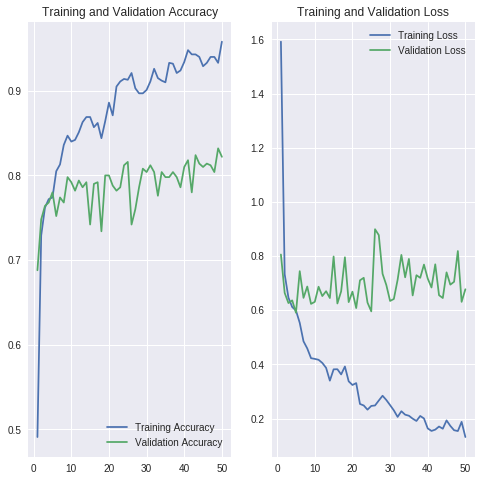

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, EPOCHS+1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Part 1 P2 Transfer Learning using ResNet50 and MobileNet

In [0]:
from tensorflow.keras.applications import ResNet50, MobileNet


In [18]:
conv_resnet_base = ResNet50(weights='imagenet',include_top=False, input_shape=(224, 224, 3))
conv_mobilenet_base = MobileNet(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


17227776/17225924 [==============================] - 3s 0us/step


In [19]:
conv_resnet_base.summary()
conv_mobilenet_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
model_resnet = Sequential()
model_resnet.add(conv_resnet_base)
model_resnet.add(Flatten())
model_resnet.add(Dense(2048, activation='relu'))
model_resnet.add(Dense(512, activation='relu'))
model_resnet.add(Dense(5, activation='softmax'))

model_mobilenet = Sequential()
model_mobilenet.add(conv_mobilenet_base)
model_mobilenet.add(Flatten())
model_mobilenet.add(Dense(2048, activation='relu'))
model_mobilenet.add(Dense(512, activation='relu'))
model_mobilenet.add(Dense(5, activation='softmax'))

In [21]:
model_resnet.summary()
model_mobilenet.summary()

TARGET_SHAPE = 224 
BATCH_SIZE = 32

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              205522944 
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 2565      
Total params: 230,162,309
Trainable params: 230,109,189
Non-trainable params: 53,120
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Pa

In [0]:
conv_resnet_base.trainable = False
conv_mobilenet_base.trainable = False


In [23]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=train_dir, 
    shuffle=True, 
    target_size=(TARGET_SHAPE,TARGET_SHAPE),
    class_mode='categorical')

# Validation data should not be augmented!
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=validation_dir, 
    target_size=(TARGET_SHAPE, TARGET_SHAPE),
    class_mode='categorical')

Found 1000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


## Transfer Learning on ResNet50 and its plots

In [24]:
model_resnet.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# Now is a good time for a cup of coffee
resnet_history = model_resnet.fit_generator(
      train_data_gen,
      steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
      epochs=EPOCHS,
      validation_data=val_data_gen,
      validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
      verbose=2)

Epoch 1/50
16/16 [==============================] - 6s 400ms/step - loss: 12.8756 - acc: 0.2000
 - 24s - loss: 12.4927 - acc: 0.2020 - val_loss: 12.8756 - val_acc: 0.2000
Epoch 2/50
16/16 [==============================] - 4s 280ms/step - loss: 12.9323 - acc: 0.2000
 - 20s - loss: 12.9220 - acc: 0.2000 - val_loss: 12.9323 - val_acc: 0.2000
Epoch 3/50
16/16 [==============================] - 4s 269ms/step - loss: 12.8756 - acc: 0.2000
 - 21s - loss: 12.8762 - acc: 0.2000 - val_loss: 12.8756 - val_acc: 0.2000
Epoch 4/50
16/16 [==============================] - 4s 270ms/step - loss: 12.9323 - acc: 0.2000
 - 21s - loss: 12.9677 - acc: 0.2000 - val_loss: 12.9323 - val_acc: 0.2000
Epoch 5/50
16/16 [==============================] - 4s 272ms/step - loss: 12.8756 - acc: 0.2000
 - 21s - loss: 12.7846 - acc: 0.2000 - val_loss: 12.8756 - val_acc: 0.2000
Epoch 6/50
16/16 [==============================] - 4s 273ms/step - loss: 12.9511 - acc: 0.2000
 - 21s - loss: 12.9220 - acc: 0.2000 - val_loss: 

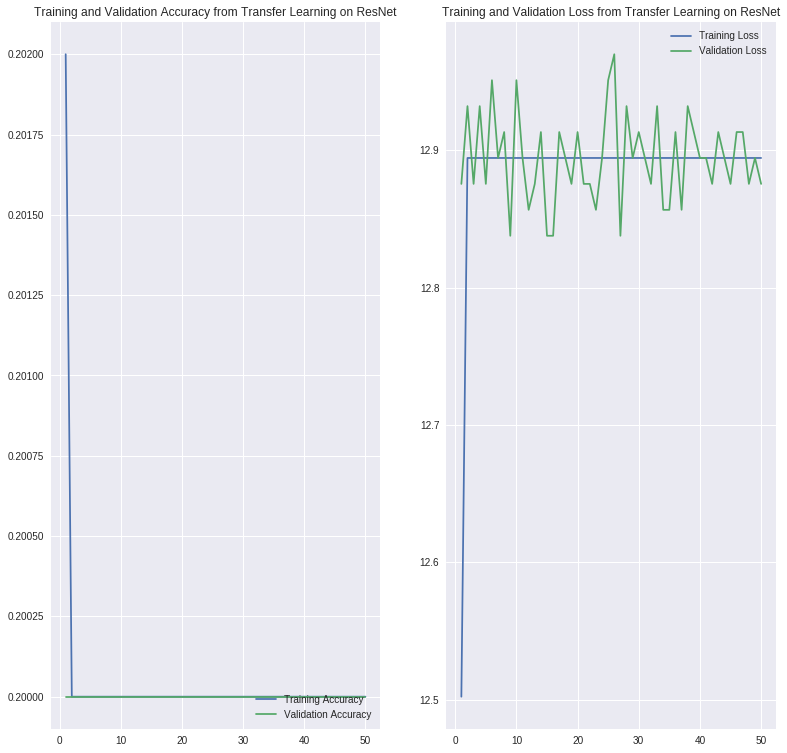

In [25]:
acc = resnet_history.history['acc']
val_acc = resnet_history.history['val_acc']

loss = resnet_history.history['loss']                                              
val_loss = resnet_history.history['val_loss']

epochs_range = range(1, EPOCHS+1)

plt.figure(figsize=(13,13))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy from Transfer Learning on ResNet')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss from Transfer Learning on ResNet')
plt.show()

## Transfer Learning on MobileNet and its plots

In [26]:
model_mobilenet.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# Now is a good time for a cup of coffee
mobilenet_history = model_mobilenet.fit_generator(
      train_data_gen,
      steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
      epochs=EPOCHS,
      validation_data=val_data_gen,
      validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
      verbose=2)

Epoch 1/50
16/16 [==============================] - 3s 184ms/step - loss: 12.8945 - acc: 0.2000
 - 15s - loss: 12.6543 - acc: 0.1990 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 2/50
16/16 [==============================] - 2s 152ms/step - loss: 12.8756 - acc: 0.2000
 - 16s - loss: 12.9220 - acc: 0.2000 - val_loss: 12.8756 - val_acc: 0.2000
Epoch 3/50
16/16 [==============================] - 2s 155ms/step - loss: 12.8756 - acc: 0.2000
 - 16s - loss: 12.9220 - acc: 0.2000 - val_loss: 12.8756 - val_acc: 0.2000
Epoch 4/50
16/16 [==============================] - 2s 152ms/step - loss: 12.8756 - acc: 0.2000
 - 16s - loss: 12.9220 - acc: 0.2000 - val_loss: 12.8756 - val_acc: 0.2000
Epoch 5/50
16/16 [==============================] - 2s 149ms/step - loss: 12.8756 - acc: 0.2000
 - 16s - loss: 12.8304 - acc: 0.2000 - val_loss: 12.8756 - val_acc: 0.2000
Epoch 6/50
16/16 [==============================] - 2s 155ms/step - loss: 12.8756 - acc: 0.2000
 - 16s - loss: 12.8762 - acc: 0.2000 - val_loss: 

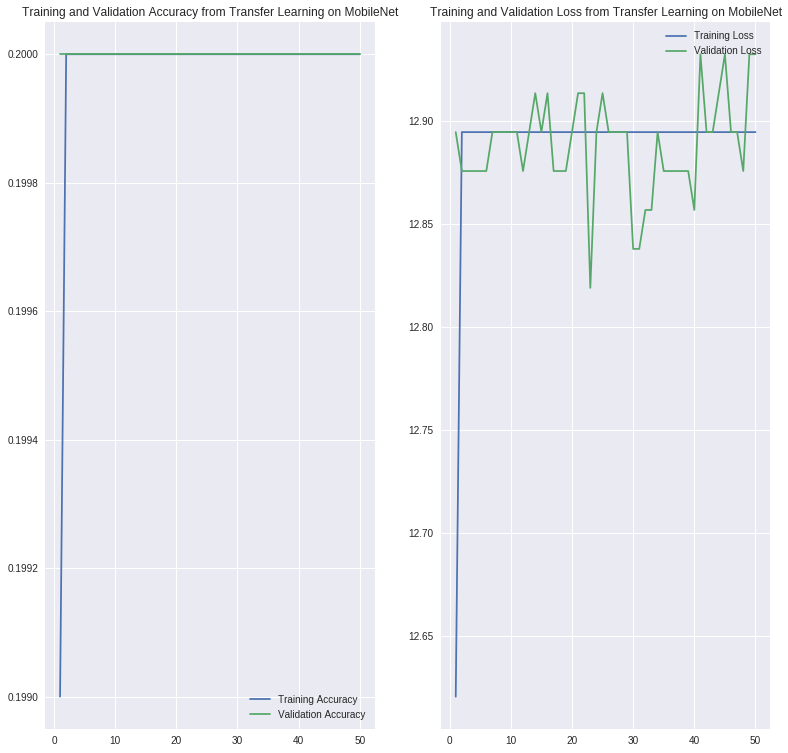

In [28]:
acc = mobilenet_history.history['acc']
val_acc = mobilenet_history.history['val_acc']

loss = mobilenet_history.history['loss']                                              
val_loss = mobilenet_history.history['val_loss']

epochs_range = range(1, EPOCHS+1)

plt.figure(figsize=(13,13))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy from Transfer Learning on MobileNet')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss from Transfer Learning on MobileNet')
plt.show()